In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.impute import KNNImputer
import missingno as msno
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler, Normalizer


from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import missingno as msno
from fancyimpute import SoftImpute
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from xgboost import XGBRegressor

# Load the iris dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

# Introduce some missing values
np.random.seed(42)
data.iloc[::10, 0] = np.nan  # Insert NaN values in the first column
data.iloc[::15, 1] = np.nan  # Insert NaN values in the second column
data.iloc[::20, 2] = np.nan  # Insert NaN values in the third column



2024-07-18 18:08:16.852255: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-18 18:08:16.861364: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-18 18:08:16.873045: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-18 18:08:16.873069: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-18 18:08:16.881378: I tensorflow/core/platform/cpu_feature_gua

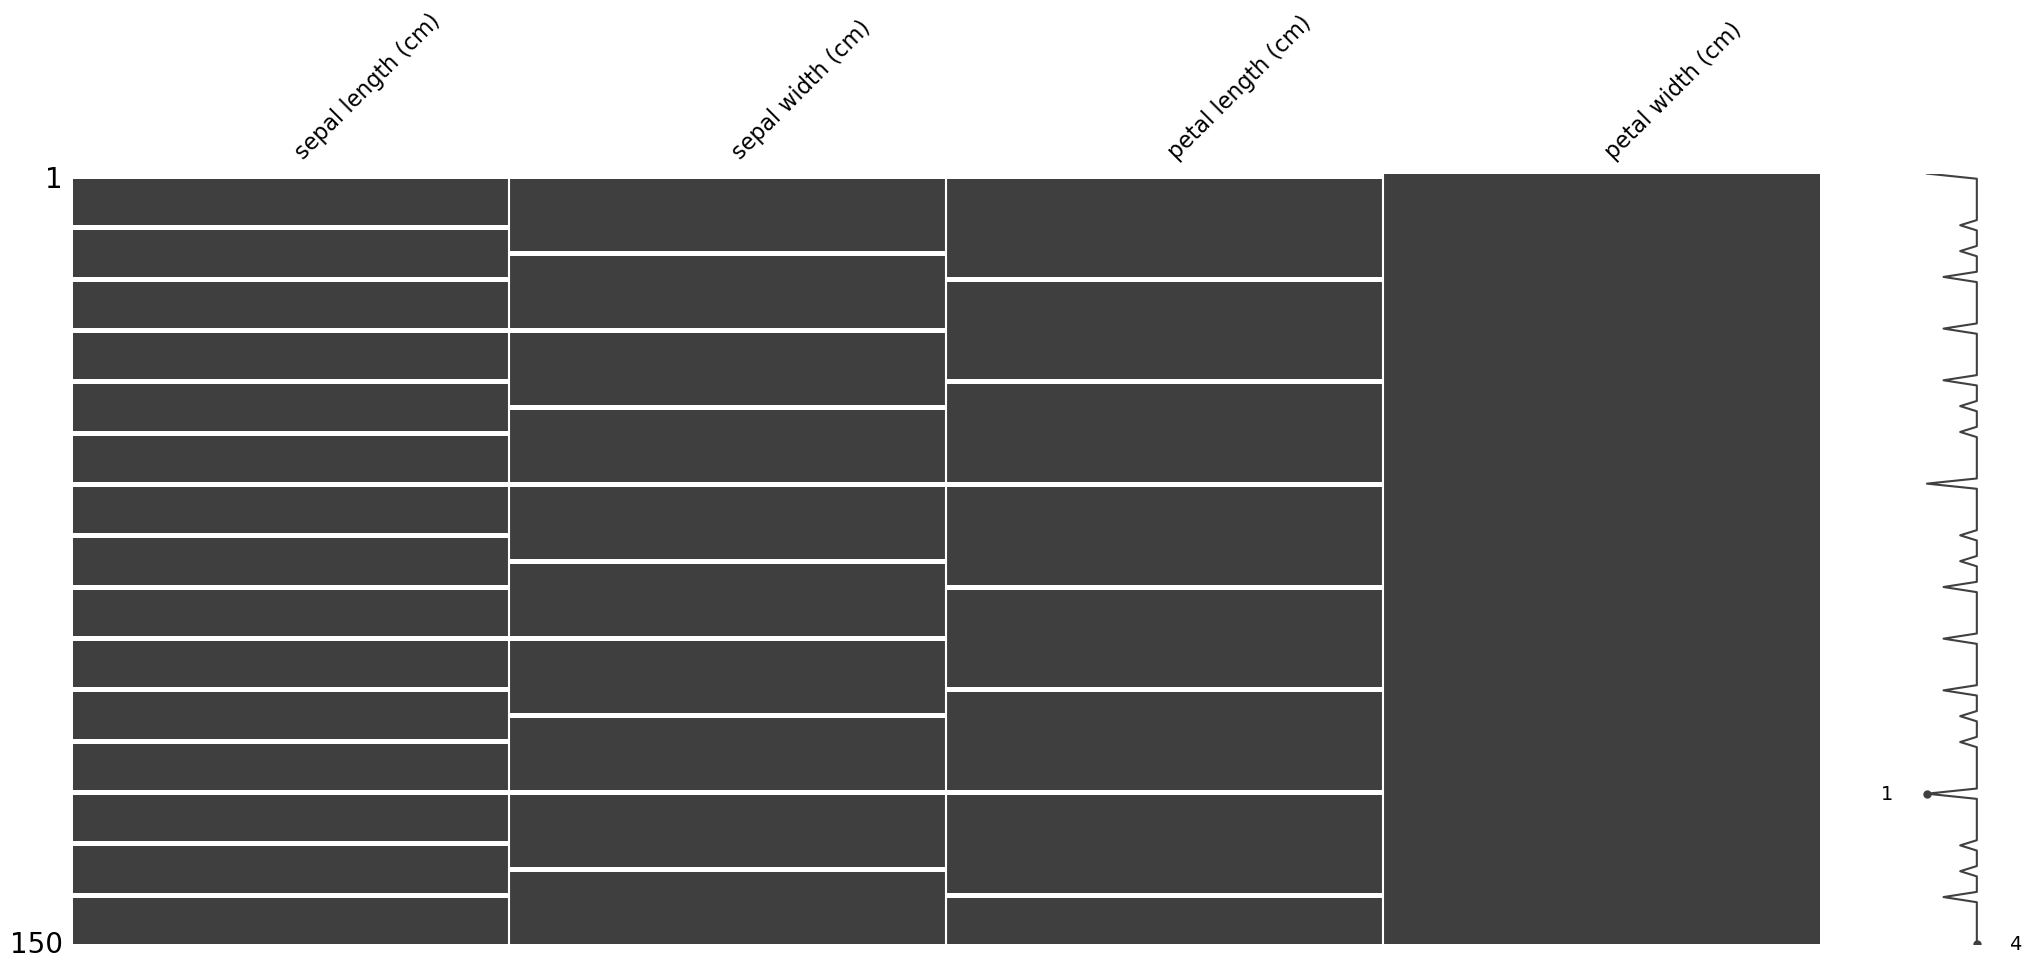

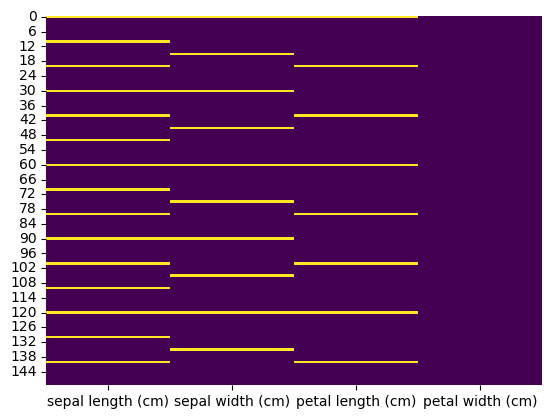

/tmp/ipykernel_75180/3105271993.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_ffill_imputed.fillna(method='ffill', inplace=True)
/tmp/ipykernel_75180/3105271993.py:26: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_bfill_imputed.fillna(method='bfill', inplace=True)


In [2]:
# Visualize missing values
msno.matrix(data)
plt.show()

sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.show()

# Mean Imputation
data_mean_imputed = data.copy()
data_mean_imputed.fillna(data_mean_imputed.mean(), inplace=True)

# Median Imputation
data_median_imputed = data.copy()
data_median_imputed.fillna(data_median_imputed.median(), inplace=True)

# Mode Imputation
data_mode_imputed = data.copy()
data_mode_imputed.fillna(data_mode_imputed.mode().iloc[0], inplace=True)

# Forward Fill
data_ffill_imputed = data.copy()
data_ffill_imputed.fillna(method='ffill', inplace=True)

# Backward Fill
data_bfill_imputed = data.copy()
data_bfill_imputed.fillna(method='bfill', inplace=True)

# KNN Imputation
knn_imputer = KNNImputer(n_neighbors=5)
data_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(data), columns=data.columns)



In [3]:
# Visualization function
def plot_imputed_data(original, imputed, title):
    plt.scatter(original.iloc[:, 0], original.iloc[:, 1], color='red', label='Missing Values')
    plt.scatter(imputed.iloc[:, 0], imputed.iloc[:, 1], color='blue', label='Imputed Values')
    plt.title(title)
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.legend()
    plt.show()



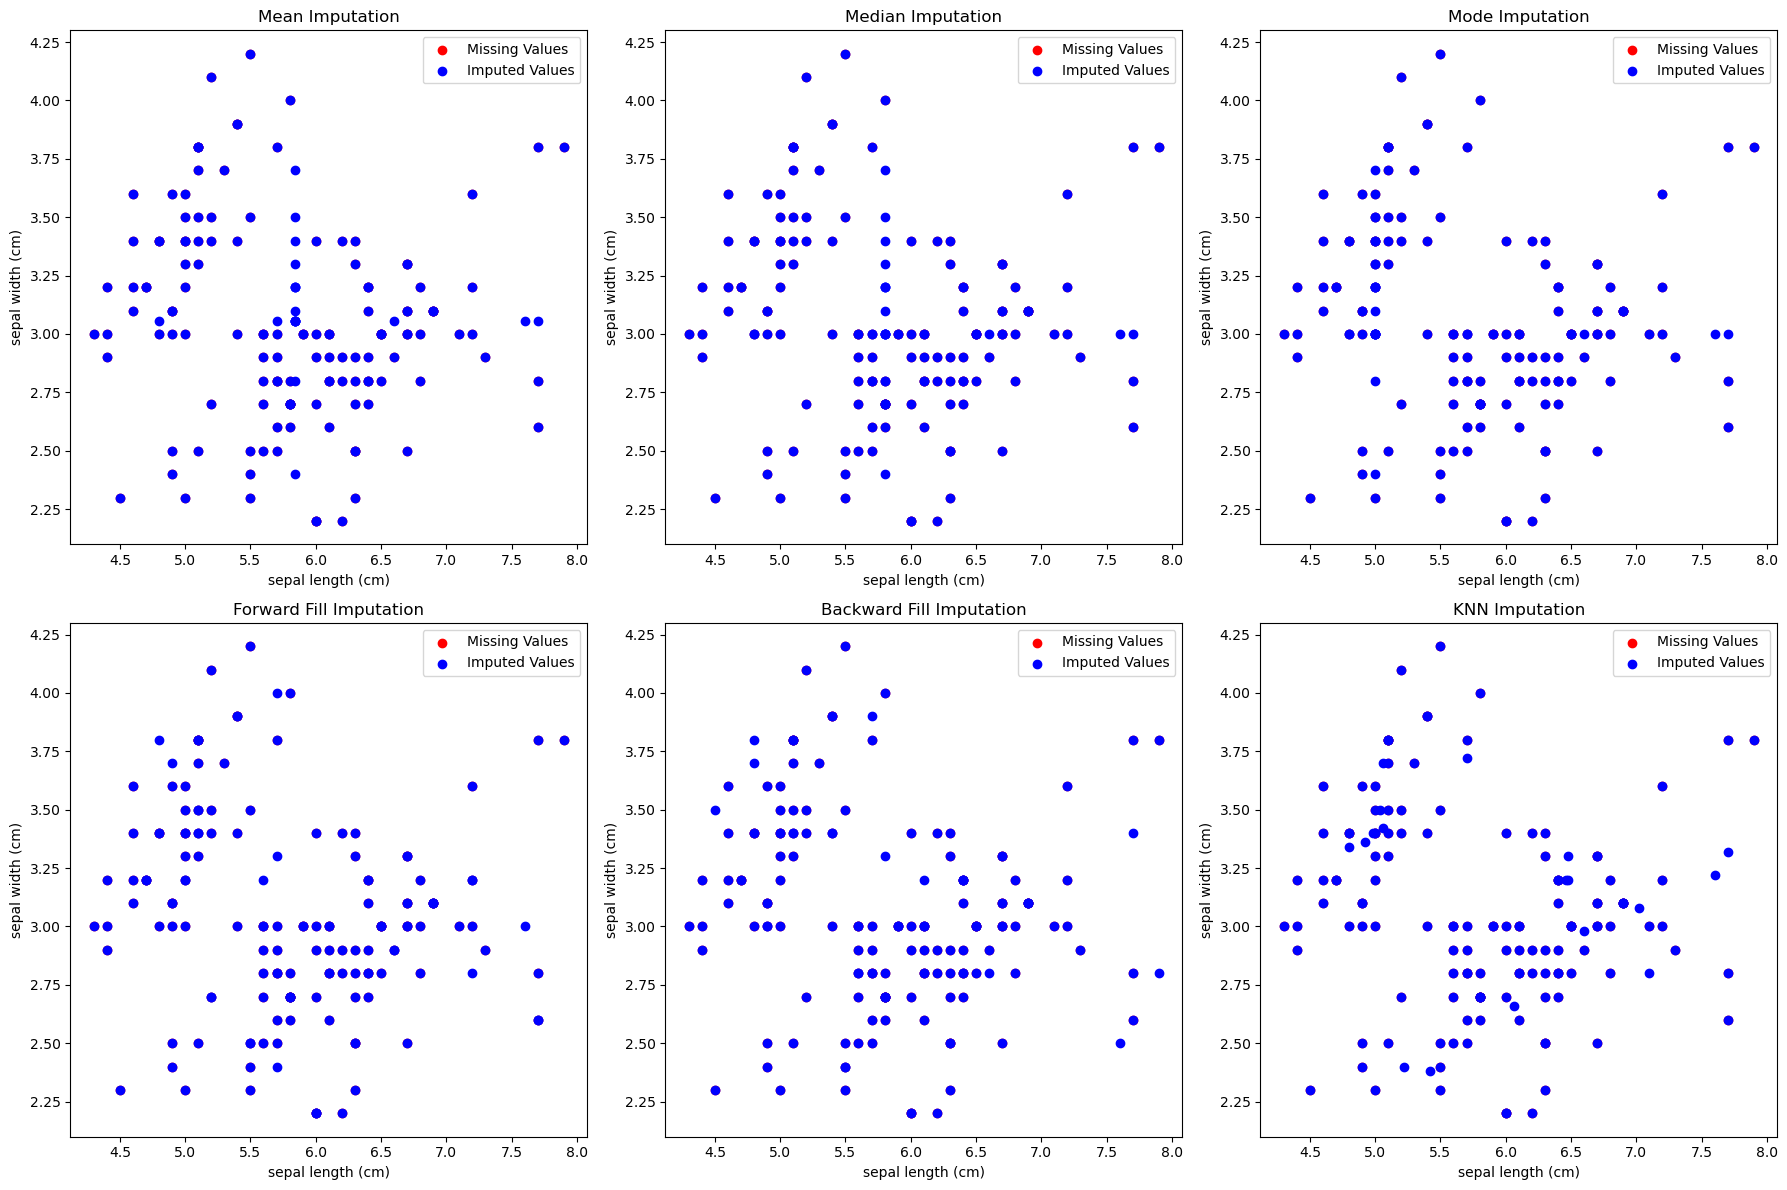

In [4]:

# Visualization function
def plot_imputed_data(ax, original, imputed, title):
    ax.scatter(original.iloc[:, 0], original.iloc[:, 1], color='red', label='Missing Values')
    ax.scatter(imputed.iloc[:, 0], imputed.iloc[:, 1], color='blue', label='Imputed Values')
    ax.set_title(title)
    ax.set_xlabel(iris.feature_names[0])
    ax.set_ylabel(iris.feature_names[1])
    ax.legend()

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot original and imputed data
plot_imputed_data(axes[0, 0], data, data_mean_imputed, 'Mean Imputation')
plot_imputed_data(axes[0, 1], data, data_median_imputed, 'Median Imputation')
plot_imputed_data(axes[0, 2], data, data_mode_imputed, 'Mode Imputation')
plot_imputed_data(axes[1, 0], data, data_ffill_imputed, 'Forward Fill Imputation')
plot_imputed_data(axes[1, 1], data, data_bfill_imputed, 'Backward Fill Imputation')
plot_imputed_data(axes[1, 2], data, data_knn_imputed, 'KNN Imputation')

# Adjust layout
plt.tight_layout()

# Imputation with ML algorithm 

# Multiple Imputation by Chained Equations (MICE)


In [5]:
from fancyimpute import IterativeImputer

# Perform MICE Imputation
mice_imputer = IterativeImputer()
data_mice_imputed = mice_imputer.fit_transform(data)

# Convert back to DataFrame
data_mice_imputed = pd.DataFrame(data_mice_imputed, columns=data.columns)


# Random Forest Imputation


In [6]:
from sklearn.ensemble import RandomForestRegressor

rf_imputer = IterativeImputer(estimator=RandomForestRegressor(n_estimators=10))
data_rf_imputed = rf_imputer.fit_transform(data)
data_rf_imputed = pd.DataFrame(data_rf_imputed, columns=data.columns)

/home/nivedita/anaconda3/lib/python3.10/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


# Bayesian Imputation


In [7]:
from fancyimpute import IterativeImputer

# Perform Bayesian Imputation (using MICE as an example of Bayesian approach)
bayesian_imputer = IterativeImputer()
data_bayesian_imputed = bayesian_imputer.fit_transform(data)

# Convert back to DataFrame
data_bayesian_imputed = pd.DataFrame(data_bayesian_imputed, columns=data.columns)


# Autoencoder Imputation


In [8]:
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data)

input_dim = data_normalized.shape[1]
input_layer = Input(shape=(input_dim,))
encoder = Dense(8, activation="relu")(input_layer)
encoder = Dense(4, activation="relu")(encoder)
decoder = Dense(8, activation='relu')(encoder)
decoder = Dense(input_dim, activation='sigmoid')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

autoencoder.fit(data_normalized, data_normalized, epochs=100, batch_size=10, shuffle=True, verbose=0)
data_autoencoder_imputed = autoencoder.predict(data_normalized)
data_autoencoder_imputed = scaler.inverse_transform(data_autoencoder_imputed)
data_autoencoder_imputed = pd.DataFrame(data_autoencoder_imputed, columns=data.columns)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


# Matrix Factorization Imputation


In [9]:
from fancyimpute import SoftImpute

# Perform Matrix Factorization Imputation
mf_imputer = SoftImpute()
data_mf_imputed = mf_imputer.fit_transform(data)

# Convert back to DataFrame
data_mf_imputed = pd.DataFrame(data_mf_imputed, columns=data.columns)


[SoftImpute] Max Singular Value of X_init = 90.907490
[SoftImpute] Iter 1: observed MAE=0.111594 rank=4
[SoftImpute] Iter 2: observed MAE=0.112073 rank=4
[SoftImpute] Iter 3: observed MAE=0.112541 rank=4
[SoftImpute] Iter 4: observed MAE=0.112993 rank=4
[SoftImpute] Iter 5: observed MAE=0.113445 rank=4
[SoftImpute] Iter 6: observed MAE=0.113918 rank=4
[SoftImpute] Iter 7: observed MAE=0.114370 rank=4
[SoftImpute] Iter 8: observed MAE=0.114821 rank=4
[SoftImpute] Iter 9: observed MAE=0.115256 rank=4
[SoftImpute] Iter 10: observed MAE=0.115709 rank=4
[SoftImpute] Iter 11: observed MAE=0.116178 rank=4
[SoftImpute] Iter 12: observed MAE=0.116672 rank=4
[SoftImpute] Iter 13: observed MAE=0.117195 rank=4
[SoftImpute] Iter 14: observed MAE=0.117717 rank=4
[SoftImpute] Iter 15: observed MAE=0.118242 rank=4
[SoftImpute] Iter 16: observed MAE=0.118741 rank=4
[SoftImpute] Iter 17: observed MAE=0.119234 rank=4
[SoftImpute] Iter 18: observed MAE=0.119716 rank=4
[SoftImpute] Iter 19: observed MAE=0.

#  Gradient Boosting Imputation


In [10]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from xgboost import XGBRegressor

# Perform Gradient Boosting Imputation
gb_imputer = IterativeImputer(estimator=XGBRegressor())
data_gb_imputed = gb_imputer.fit_transform(data)

# Convert back to DataFrame
data_gb_imputed = pd.DataFrame(data_gb_imputed, columns=data.columns)


/home/nivedita/anaconda3/lib/python3.10/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


# Visualization Function


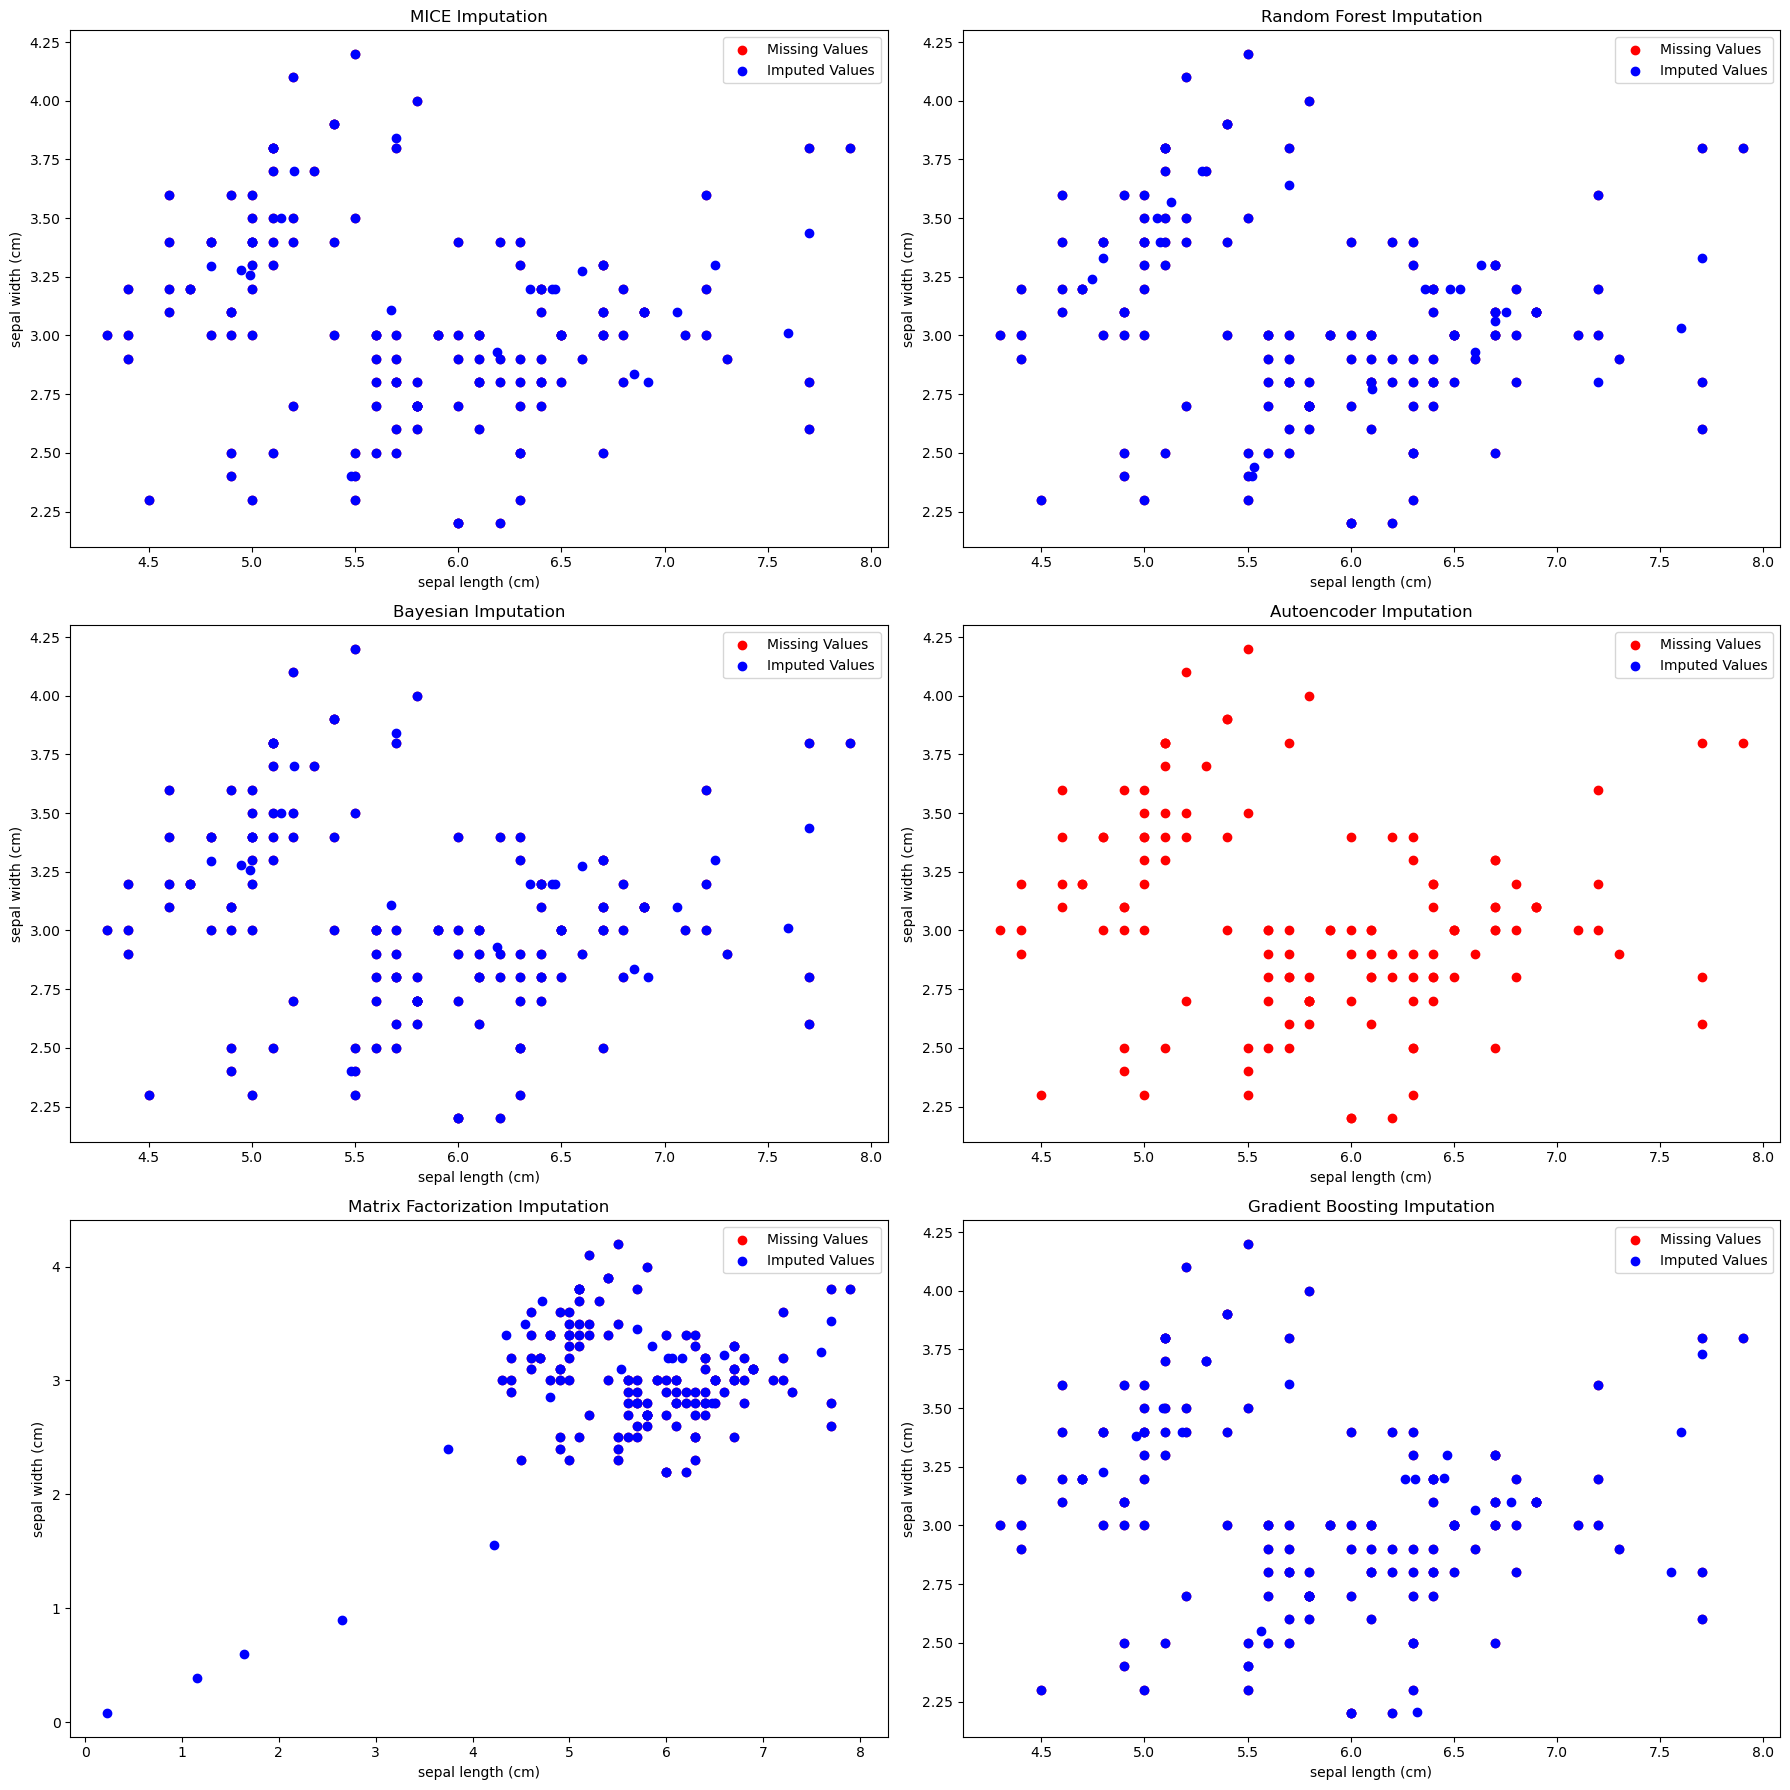

In [11]:
def plot_imputed_data(ax, original, imputed, title):
    ax.scatter(original.iloc[:, 0], original.iloc[:, 1], color='red', label='Missing Values')
    ax.scatter(imputed.iloc[:, 0], imputed.iloc[:, 1], color='blue', label='Imputed Values')
    ax.set_title(title)
    ax.set_xlabel(iris.feature_names[0])
    ax.set_ylabel(iris.feature_names[1])
    ax.legend()

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(18, 18))

# Plot original and imputed data
plot_imputed_data(axes[0, 0], data, data_mice_imputed, 'MICE Imputation')
plot_imputed_data(axes[0, 1], data, data_rf_imputed, 'Random Forest Imputation')
plot_imputed_data(axes[1, 0], data, data_bayesian_imputed, 'Bayesian Imputation')
plot_imputed_data(axes[1, 1], data, data_autoencoder_imputed, 'Autoencoder Imputation')
plot_imputed_data(axes[2, 0], data, data_mf_imputed, 'Matrix Factorization Imputation')
plot_imputed_data(axes[2, 1], data, data_gb_imputed, 'Gradient Boosting Imputation')

# Adjust layout
plt.tight_layout()
plt.show()
